In [276]:
##how many columns
import calendar as cld
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
from datetime import datetime

fh = 'train.csv'
df = pd.read_csv(fh)

print(len(df.columns))

12


In [277]:
##how many rows
print(len(df))

10886


In [ ]:
##what are the datatype
print(df.dtypes)

In [ ]:
##Are there missing values in each columns
df.isnull().sum()
##no missing value in each column


In [ ]:
#feature engineer
def get_season(season_num):
    if season_num == 1:
        return 'Spring'
    elif season_num == 2:
        return 'Summer'
    elif season_num == 3:
        return 'Fall'
    elif season_num == 4:
        return 'Winter'
    
def get_weather(weather_num):
    if weather_num == 1:
        return 'Clear'
    elif weather_num == 2:
        return 'Mist + Cloudy'
    elif weather_num == 3:
        return 'Light Snow'
    elif weather_num == 4:
        return 'Snow + Fog '
 
df['datetime'] = pd.to_datetime(df.datetime)
df['hour'] = df['datetime'].map(lambda x: x.hour).astype('category')
df['month'] = df['datetime'].map(lambda x: x.month).astype('category')
df['date'] = df['datetime'].map(lambda x: str(datetime.date(x))[5:]).astype('category')
df['season_cat'] = df['season'].map(get_season).astype('category')
df['weather_cat'] = df['weather'].map(get_weather).astype('category')
df['week_day'] = df['datetime'].map(lambda x: cld.day_name[x.weekday()-1]).astype('category')
df.columns
new_df = df[['datetime','holiday', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'hour', 'month', 'date', 'season_cat', 'weather_cat', 'week_day']]

In [ ]:
%matplotlib inline
##What hour of a day are bikes rented most?
result = df['count'].groupby(df['hour']).mean()
result = result.reset_index()
count_max = result['count'].max()
hour_loc = result.loc[result['count'] == result['count'].max()]['hour']

plt.plot(result['hour'], result['count'], color='r')
plt.title('Bike renting frequency')
plt.xlabel('hours in a day')
plt.ylabel('average number of bike rented')
plt.annotate('local max', xy=(hour_loc, count_max), 
            arrowprops=dict(facecolor='black', shrink=1),
            )
plt.legend(['bike rent frequency'])
##Bike is rented most at 5PM

In [ ]:
%matplotlib inline
#At what season and what hour of a day are bikes rented most?
result_season_hour = df.groupby([df['hour'],df['season_cat']]).mean()['count'].to_frame().reset_index()
#print(result_season_hour.loc[lambda x: x.])


#data = result_season_hour['count']
t1 = result_season_hour.loc[lambda x: x['season_cat'] == 'Spring']
t2 = result_season_hour.loc[lambda x: x['season_cat'] == 'Summer']
t3 = result_season_hour.loc[lambda x: x['season_cat'] == 'Fall']
t4 = result_season_hour.loc[lambda x: x['season_cat'] == 'Winter']

plt.plot(t1['hour'],t1['count'])
plt.plot(t2['hour'],t2['count'])
plt.plot(t3['hour'],t3['count'])
plt.plot(t4['hour'],t4['count'])
plt.title('Bike renting frequency')
plt.xlabel('hour in a day')
plt.ylabel('average number of bike rented')
plt.legend(['Spring','Summer','Fall','Winter'])

##regardless of the season, bike is mostly rented at 5pm


In [ ]:
%matplotlib inline
##At which month and what hour of a day are bikes rented most?

def get_month(datetime):
    return datetime.month

df['month'] = df['datetime'].apply(get_month)

result_month_hour = df.groupby([df['hour'],df['month']]).mean()['count'].to_frame().reset_index()

for i in range(1,13):
    temp = result_month_hour.loc[lambda x: x['month'] == i]
    plt.plot(temp['hour'],temp['count'])
    


plt.title('Bike renting frequency')
plt.xlabel('hour in a day')
plt.ylabel('average number of bike rented')
month_index = range(1,13)
plt.legend(month_index)

## regardless of the month, bike is mostly rented at 5pm


ValueError: Buffer has wrong number of dimensions (expected 1, got 2)

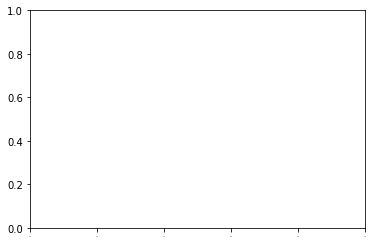

In [265]:
%matplotlib inline
#Which date have the most rented bikes in the dataset?
import matplotlib.dates as mdates

result = df.groupby(df['date']).mean()['count']
fig, ax = plt.subplots(1,1,sharex=False,sharey=False)
#fig.size = 
ax.set_xticklabels(df['date'], rotation=0, fontsize=0.0001)
plt.plot(result.index,result)
plt.title('Bike renting frequency')
plt.xlabel('date')
plt.ylabel('average number of bike rented')
plt.legend('numbike')

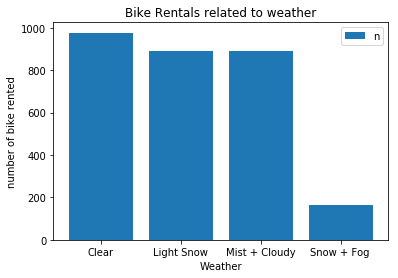

In [270]:
##group by mean bar
# Explore bike rentals in terms of weather
#count_by_weather= df[['weather_cat','count']]
plt.bar(df['weather_cat'],df['count'])
plt.title('Bike Rentals related to weather')
plt.xlabel('Weather')
plt.ylabel('number of bike rented')
plt.legend('numbike')


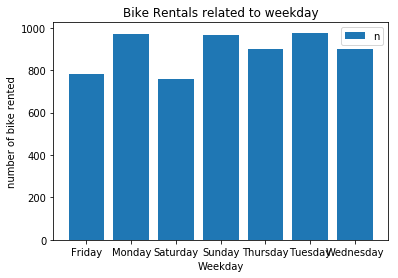

In [271]:
# Explore bike rentals in terms of weekday
#group by mean 
##box plot
plt.bar(df['week_day'],df['count'])
plt.title('Bike Rentals related to weekday')
plt.xlabel('Weekday')
plt.ylabel('number of bike rented')
plt.legend('numbike')

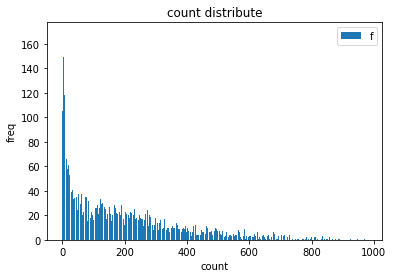

In [272]:
#plot the general distribution of "count" column (histogram)

dist = df.groupby(['count']).size()
plt.bar(dist.index,dist)
plt.title('count distribute')
plt.xlabel('count')
plt.ylabel('freq')
plt.legend('freq')


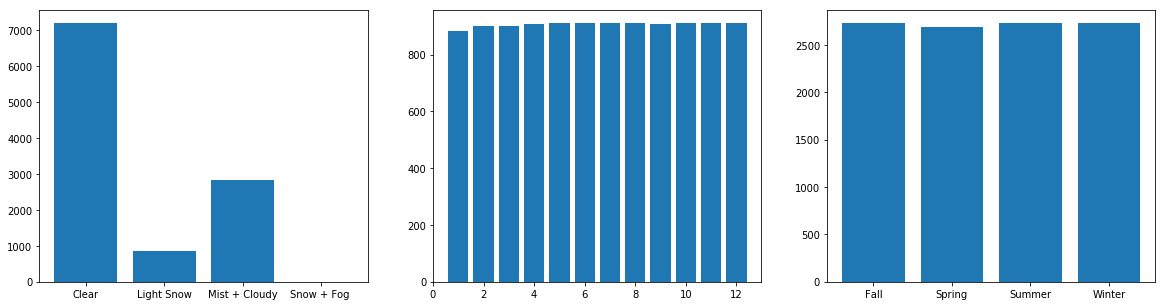

In [273]:
#explore what the most frequently seen weather/month/season
dist_weather = new_df.groupby(['weather_cat']).size()
dist_month = new_df.groupby(['month']).size()
dist_season = new_df.groupby(['season_cat']).size()
fig, (ax1,ax2,ax3) = plt.subplots(1,3,sharex=False,sharey=False)
ax1.bar(dist_weather.index,dist_weather)
ax2.bar(dist_month.index,dist_month)
ax3.bar(dist_season.index,dist_season)
fig.set_figheight(5)
fig.set_figwidth(20)
##bike is mostly rented on a clear day
##month and season has minimal effect on number of bike rented


In [54]:
df['hour'].astype('category')
df['month'].astype('category')
df['date'].astype('category')
df['week_day'].astype('category')
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,month,date,season_cat,weather_cat,week_day
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,0,1,01-01,Spring,Clear,Friday
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,1,1,01-01,Spring,Clear,Friday
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2,1,01-01,Spring,Clear,Friday
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,3,1,01-01,Spring,Clear,Friday
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,4,1,01-01,Spring,Clear,Friday
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1,5,1,01-01,Spring,Mist + Cloudy,Friday
6,2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2,6,1,01-01,Spring,Clear,Friday
7,2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,3,7,1,01-01,Spring,Clear,Friday
8,2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,7,8,8,1,01-01,Spring,Clear,Friday
9,2011-01-01 09:00:00,1,0,0,1,13.12,17.425,76,0.0000,8,6,14,9,1,01-01,Spring,Clear,Friday


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
season,1.000000,0.029368,-0.008126,0.008879,0.258689,0.264744,0.190610,-0.147121,0.096758,0.164011,0.163439
holiday,0.029368,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409,0.043799,-0.020956,-0.005393
workingday,-0.008126,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,-0.319111,0.119460,0.011594
weather,0.008879,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.135918,-0.109340,-0.128655
temp,0.258689,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454
atemp,0.264744,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784
humidity,0.190610,0.001929,-0.010880,0.406244,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371
windspeed,-0.147121,0.008409,0.013373,0.007261,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369
casual,0.096758,0.043799,-0.319111,-0.135918,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414
registered,0.164011,-0.020956,0.119460,-0.109340,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948


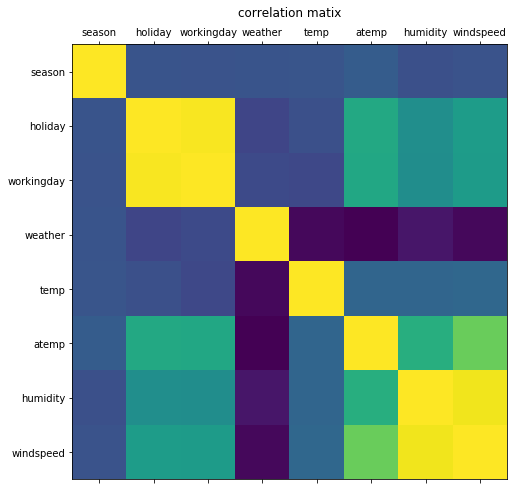

In [274]:
#explore correlation matrix and plots
fig, ax = plt.subplots()
ax.matshow(new_df.corr())
ax.set_title('correlation matix')
ax.set_xticklabels(['']+df.columns)
ax.set_yticklabels(['']+df.columns)
fig.set_figheight(8)
fig.set_figwidth(8)
df.corr()

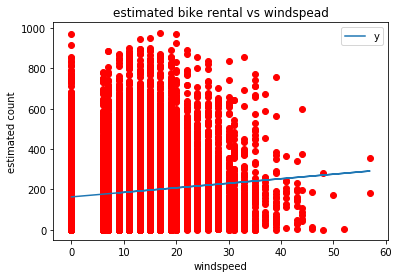

In [275]:
#use the package you choose to model a single variable regession
from scipy import stats
import numpy as np
x = df['windspeed']
y = df['count']
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
y_estimated = df['windspeed'].apply(lambda x: slope*x + intercept).reset_index().set_index(df['windspeed'])
plt.plot(y_estimated.index,y_estimated['windspeed'])
plt.title('estimated bike rental vs windspead')
plt.xlabel('windspeed')
plt.ylabel('estimated count')
plt.legend('y*')
plt.scatter(x,y,color='r')

In [57]:
##define the cost function and calculate the corresponding cost 
def cost_function(data,x,y,slope,intercept):
    tol_var = 0
    ct = 0
    for i in data.index:
        temp_x = float(data[x][i])
        temp_y = float(data[y][i])
        tol_var += (slope * temp_x +intercept - temp_y)**2
        ct += 1
        
    return 1/(2*ct)*tol_var 
data = df[['count','windspeed']]
print('corresponding cost for (10) is {}'.format(cost_function(data,'windspeed','count',slope,intercept)))



corresponding cost for (10) is 16236.573908978904


In [278]:
##onehotencoder -- change categorical data to boolean
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
#values = new_df['weather_cat']
df_regress = new_df[['holiday','temp','atemp','humidity','windspeed','casual','registered','count']]
#label_encoder = LabelEncoder()
#integer_encoded = label_encoder.fit_transform(values)
#onehot_encoder = OneHotEncoder(sparse=False)
#integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
df_regress[pd.get_dummies(new_df['weather_cat']).columns]=pd.get_dummies(new_df['weather_cat'])
df_regress[pd.get_dummies(new_df['season_cat']).columns]=pd.get_dummies(new_df['season_cat'])
df_regress[pd.get_dummies(new_df['week_day']).columns]=pd.get_dummies(new_df['week_day'])
df_regress[pd.get_dummies(new_df['month']).columns]=pd.get_dummies(new_df['month'])
df_regress[pd.get_dummies(new_df['hour']).columns]=pd.get_dummies(new_df['hour'])
df_regress[pd.get_dummies(new_df['season_cat']).columns]=pd.get_dummies(new_df['weather_cat'])
df_regress[pd.get_dummies(new_df['date']).columns]=pd.get_dummies(new_df['date'])

/Users/mac/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:2352: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [309]:
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats



columns=list(df_regress.set_index('count').columns)

def backward_elimination(df_regress,columns,step):
    #step=step+1
    #print(step)
    X = df_regress[columns]
    y = df_regress['count']
    X2 = sm.add_constant(X)
    est = sm.OLS(y, X2)
    est2 = est.fit()
    predictor = ''
    p_valu_max = 0
    predictor_index=0
    for i in range(len(columns)):
        if est2.pvalues[columns[i]]>p_value:
            p_value_max = est2.pvalues[columns[i]]
            predictor = columns[i]
            predictor_index=i
        else:
            continue
    if p_value_max > 0.05:
        columns.pop(i)
        return backward_elimination(df_regress,columns,step)
    else:
        return columns
        
columns_to_keep = backward_elimination(df_regress,columns,0)
print(columns_to_keep)


0
0
0
0
0
0
['holiday', 'temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'Clear', 'Light Snow', 'Mist + Cloudy', 'Snow + Fog ', 'Fall', 'Spring', 'Summer', 'Winter', 'Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday', 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 0, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, '01-01', '01-02', '01-03', '01-04', '01-05', '01-06', '01-07', '01-08', '01-09', '01-10', '01-11', '01-12', '01-13', '01-14', '01-15', '01-16', '01-17', '01-18', '01-19', '02-01', '02-02', '02-03', '02-04', '02-05', '02-06', '02-07', '02-08', '02-09', '02-10', '02-11', '02-12', '02-13', '02-14', '02-15', '02-16', '02-17', '02-18', '02-19', '03-01', '03-02', '03-03', '03-04', '03-05', '03-06', '03-07', '03-08', '03-09', '03-10', '03-11', '03-12', '03-13', '03-14', '03-15', '03-16', '03-17', '03-18', '03-19', '04-01', '04-02', '04-03', '04-04', '04-05', '04-06', '04-07', '04-08', '04-09', '04-10', '04-11', '04-12', '04-13', '04-14', '04-15', '04-1

['holiday', 'temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'Clear', 'Light Snow', 'Mist + Cloudy', 'Snow + Fog ', 'Fall', 'Spring', 'Summer', 'Winter', 'Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday', 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 0, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, '01-01', '01-02', '01-03', '01-04', '01-05', '01-06', '01-07', '01-08', '01-09', '01-10', '01-11', '01-12', '01-13', '01-14', '01-15', '01-16', '01-17', '01-18', '01-19', '02-01', '02-02', '02-03', '02-04', '02-05', '02-06', '02-07', '02-08', '02-09', '02-10', '02-11', '02-12', '02-13', '02-14', '02-15', '02-16', '02-17', '02-18', '02-19', '03-01', '03-02', '03-03', '03-04', '03-05', '03-06', '03-07', '03-08', '03-09', '03-10', '03-11', '03-12', '03-13', '03-14', '03-15', '03-16', '03-17', '03-18', '03-19', '04-01', '04-02', '04-03', '04-04', '04-05', '04-06', '04-07', '04-08', '04-09', '04-10', '04-11', '04-12', '04-13', '04-14', '04-15', '04-16', '04-17',